## Network Analysis using NetworkX

## What are Networks (Graphs)?

A graph G is represented by a set of nodes and a set of edges. An edge between two nodes in a graph signifies a relationship between those two nodes. Edges can be directed and undirected.
![title](img/network.png)

# Examples?

![title](img/example.png)

NetworkX uses dictionaries underneath to store node and edge data.
It's dict-o-dict-o-dict-o-dict to be precise.
```
G['node1']
G['node1']['node2']
G['node1']['node2']['some_id']['some_attrb']
```

In [252]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [253]:
# Create an empty graph object with no nodes and edges.
G = nx.Graph() # DiGraph, MultiGraph, MultiDiGraph

In [254]:
# Add nodes to our graph object
# In NetworkX, nodes can be any hashable object e.g. a text string, an image,
# an XML object, another Graph, a customized node object, etc.

G.add_node('1')
G.add_node(1)
G.add_node('second')

# G.add_node({'dictionary': 'will throw error'})
# G.add_node([1, 2])

In [255]:
list_of_nodes = [1, 2, 3, 'node4']
G.add_nodes_from(list_of_nodes)

In [256]:
# Access nodes in a Graph object
G.nodes()

[1, 2, 3, '1', 'second', 'node4']

In [257]:
# NetworkX has a lot of graph generators path_graph is one of them.
H = nx.path_graph(7)
print H.nodes()

[0, 1, 2, 3, 4, 5, 6]


In [258]:
G.add_nodes_from(H)
print G.nodes()

[0, 1, 2, 3, 4, 5, 6, '1', 'second', 'node4']


Difference between `G.add_node(H)` and `G.add_nodes_from(H)`?

In [259]:
G.add_node(H)
print G.nodes()

[0, 1, 2, 3, 4, 5, 6, '1', <networkx.classes.graph.Graph object at 0x1096ea510>, 'second', 'node4']


In [9]:
# Now let's talk about edges.
# Edge between two nodes means that they share some property/relationship
# G.add_node(H)
G.add_edge(0, 'second')
G.add_edge(2, 3)
G.add_edge('second', 'node4')

list_of_edges = [(2, 3), (4, 5), ('node4', 0)]
G.add_edges_from(list_of_edges)

# Check out edges
G.edges()

[(0, 'second'), (0, 'node4'), (2, 3), (4, 5), ('second', 'node4')]

In [260]:
# Number of nodes and edges.
print G.number_of_nodes(), len(G), len(G.nodes())
print G.number_of_edges(), len(G.edges())

11 11 11
0 0


In [11]:
print G.nodes()
G.remove_node(0)
print G.nodes()

[0, 1, 2, 3, 4, 5, 6, '1', 'second', <networkx.classes.graph.Graph object at 0x10b584950>, 'node4']
[1, 2, 3, 4, 5, 6, '1', 'second', <networkx.classes.graph.Graph object at 0x10b584950>, 'node4']


In [12]:
print G.edges()
G.remove_edge(4, 5)
print G.edges()

[(2, 3), (4, 5), ('second', 'node4')]
[(2, 3), ('second', 'node4')]


In [13]:
G.clear()
print G.nodes(), G.edges()

[] []


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
[(0, 1), (0, 10), (0, 14), (0, 9), (1, 8), (1, 14), (1, 7), (2, 11), (3, 4), (3, 7), (4, 11), (5, 6), (6, 9), (6, 10), (7, 8), (9, 11), (11, 13), (12, 14)]


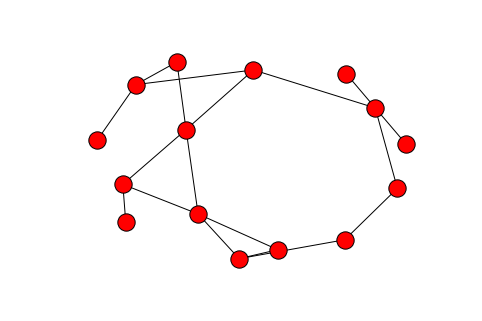

In [70]:
# One more graph generator. This will create
# a Erdos-Reyni Graph
G = nx.erdos_renyi_graph(15, 0.2, seed=1)

# Let's checkout nodes and edges
print G.nodes()
print G.edges()
nx.draw(G)

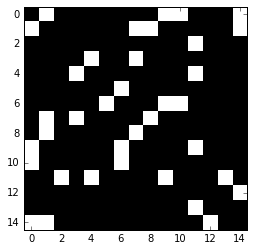

In [73]:
matrix = nx.to_numpy_matrix(G)
# print matrix

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect('equal')
plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.gray)
plt.show()

Adding attributes and weights.

In [74]:
G.add_edge(1, 2, weight=4.7)

G.add_edges_from([(3, 4), (4, 5)], color='red')

G.add_edges_from([(1, 2, {'color': 'blue'}), (2, 3, {'weight': 8})])

G[1][2]['weight'] = 4.7

In [75]:
# Adding attributes to graphs, nodes, and edges.
G.graph['attr'] = 'EuroSciPy'

print G.graph

G.add_node(1, time='11:00AM')
print G.nodes()
print G.nodes(data=True)

{'name': 'gnp_random_graph(15,0.2)', 'attr': 'EuroSciPy'}
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
[(0, {}), (1, {'time': '11:00AM'}), (2, {}), (3, {}), (4, {}), (5, {}), (6, {}), (7, {}), (8, {}), (9, {}), (10, {}), (11, {}), (12, {}), (13, {}), (14, {})]


In [78]:
# Accessing the graph dictionary
print 'nodes: ', G.nodes()
print 'edges: ', G.edges()

print G[0]
print G[1]
print G[1][2]

nodes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
edges:  [(0, 1), (0, 10), (0, 14), (0, 9), (1, 8), (1, 2), (1, 14), (1, 7), (2, 3), (2, 11), (3, 4), (3, 7), (4, 11), (4, 5), (5, 6), (6, 9), (6, 10), (7, 8), (9, 11), (11, 13), (12, 14)]
{1: {}, 10: {}, 14: {}, 9: {}}
{0: {}, 8: {}, 2: {'color': 'blue', 'weight': 4.7}, 14: {}, 7: {}}
{'color': 'blue', 'weight': 4.7}


In [79]:
print G[1]
print G[1][2]
print G[1][2]['color']

{0: {}, 8: {}, 2: {'color': 'blue', 'weight': 4.7}, 14: {}, 7: {}}
{'color': 'blue', 'weight': 4.7}
blue


### Exercise - 1

In [ ]:
G = nx.Graph()
list_of_cities = [('Paris', 'Munich', 841), ('Munich', 'Berlin', 584), ('Berlin', 'London', 1101), ('Paris', 'Barcelona', 1038)]
G.add_weighted_edges_from(list_of_cities)

print G.nodes()
print G.edges(data=True)
# Iterate through the edges and find the highest weight.

In [80]:
result = max([w for u, v, w in G.edges(data=True)])
print result

# max(G.edges(data=True), key=lambda x:x[2])

{'color': 'blue', 'weight': 4.7}


Let's work on a read world network.

Arxiv GR-QC (General Relativity and Quantum Cosmology) collaboration network is from the e-print arXiv and covers scientific collaborations between authors papers submitted to General Relativity and Quantum Cosmology category. If an author i co-authored a paper with author j, the graph contains a undirected edge from i to j. If the paper is co-authored by k authors this generates a completely connected (sub)graph on k nodes.

source: http://snap.stanford.edu/data/index.html#canets

In [121]:
import csv
authors_graph = nx.Graph()
with open('CA-GrQc.txt', 'r') as f:
    reader = csv.reader(f, delimiter='\t')
    for row in reader:
        authors_graph.add_edge(row[0], row[1])

In [122]:
print authors_graph.number_of_edges()
print authors_graph.number_of_nodes()

14496
5242


Neighbors of a node.

In [149]:
# Neighbors/ degree of node is one way of calculating the importance
# of the node. Influential nodes.
print authors_graph.neighbors('22504')
print len(authors_graph.neighbors('22504'))
print nx.degree(authors_graph, nbunch=['22504'])
print authors_graph.degree(nbunch=['22504'])

['17807', '15457', '19939', '12710', '9656', '5210', '23712', '6340', '12507', '6512', '15245', '15244', '7635', '18225', '19645', '24718', '7197', '15933', '10350', '16654', '19446', '9869', '20576', '20574', '15010', '14766', '1995', '2338', '4755', '88', '2530', '8727', '2535']
33
{'22504': 33}
{'22504': 33}


### Exercise - 2

Create a list of (node, degree of node) tuples and find the node with maximum degree.

In [86]:
result = [(node, len(authors_graphs.neighbors(node))) for node in authors_graphs.nodes_iter()]

In [143]:
max(result, key=lambda node:node[1])

('21012', 81)

In [144]:
authors_graphs.degree()['21012'] # returns a dictionary of degree keyed by node

81

In [148]:
authors_graph.degree()

{'3922': 10,
 '5259': 5,
 '23991': 3,
 '593': 16,
 '22466': 4,
 '19711': 1,
 '19710': 3,
 '22463': 4,
 '22462': 4,
 '21508': 67,
 '4027': 1,
 '19493': 5,
 '4023': 3,
 '4021': 2,
 '23441': 11,
 '3927': 2,
 '19962': 2,
 '3383': 1,
 '10898': 2,
 '23241': 21,
 '17290': 1,
 '14845': 2,
 '10897': 1,
 '10896': 1,
 '10895': 8,
 '17291': 2,
 '24713': 6,
 '345': 13,
 '7515': 4,
 '14924': 23,
 '19159': 6,
 '3999': 1,
 '7510': 2,
 '22269': 4,
 '3996': 5,
 '11213': 3,
 '24718': 40,
 '348': 2,
 '19150': 4,
 '3990': 3,
 '25062': 1,
 '6356': 1,
 '25060': 11,
 '16070': 1,
 '16675': 1,
 '16674': 13,
 '16676': 2,
 '25069': 2,
 '19379': 1,
 '19378': 5,
 '12701': 4,
 '12703': 2,
 '6154': 15,
 '12704': 1,
 '6156': 4,
 '6158': 4,
 '6159': 2,
 '23864': 9,
 '10967': 2,
 '10966': 6,
 '13600': 2,
 '6350': 8,
 '23841': 10,
 '2316': 3,
 '10969': 2,
 '25664': 2,
 '25667': 2,
 '25660': 5,
 '5851': 3,
 '25662': 1,
 '299': 5,
 '294': 1,
 '25668': 1,
 '293': 2,
 '8302': 1,
 '3773': 1,
 '17655': 66,
 '8553': 1,
 '12980'

In [115]:
nx.degree_centrality(authors_graph)

{'3922': 0.0019080328181644724,
 '5259': 0.0009540164090822362,
 '23991': 0.0005724098454493417,
 '593': 0.0030528525090631558,
 '22466': 0.0007632131272657889,
 '19711': 0.00019080328181644724,
 '19710': 0.0005724098454493417,
 '22463': 0.0007632131272657889,
 '22462': 0.0007632131272657889,
 '21508': 0.012783819881701965,
 '4027': 0.00019080328181644724,
 '19493': 0.0009540164090822362,
 '4023': 0.0005724098454493417,
 '4021': 0.00038160656363289447,
 '23441': 0.0020988360999809196,
 '3927': 0.00038160656363289447,
 '19962': 0.00038160656363289447,
 '3383': 0.00019080328181644724,
 '10898': 0.00038160656363289447,
 '23241': 0.0040068689181453915,
 '17290': 0.00019080328181644724,
 '14845': 0.00038160656363289447,
 '10897': 0.00019080328181644724,
 '10896': 0.00019080328181644724,
 '10895': 0.0015264262545315779,
 '17291': 0.00038160656363289447,
 '24713': 0.0011448196908986834,
 '345': 0.002480442663613814,
 '7515': 0.0007632131272657889,
 '14924': 0.004388475481778287,
 '19159': 0.0

In [150]:
# Various other measures of centrality like ``nx.closeness_centrality`` and ``nx.betweenness_centrality``

### Exercise - 3

Plot degree centrality of authors_graph.

(count vs degree centrality)

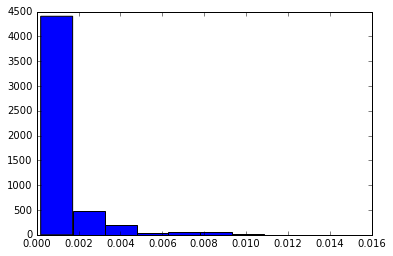

In [159]:
# G = nx.erdos_renyi_graph(500, 0.9)
plt.hist(nx.degree_centrality(authors_graph).values())
plt.show()

In [151]:
# Lets talk about connected components of a graph.
print [len(c) for c in sorted(nx.connected_components(authors_graph), key=len, reverse=True)]

[4158, 14, 12, 10, 9, 9, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

In [152]:
graphs = [c for c in sorted(nx.connected_component_subgraphs(authors_graph), key=len, reverse=True)]

In [155]:
len(graphs[0])

4158

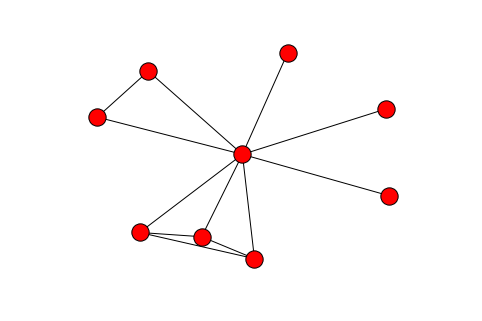

In [168]:
nx.draw(graphs[5])

### Graph Traversal

In [156]:
print nx.shortest_path(graphs[0], '22504', '23991')
print len(nx.shortest_path(graphs[0], '22504', '23991'))
print nx.shortest_path_length(graphs[0], '22504', '23991')

['22504', '6512', '18757', '5172', '3677', '23991']
6
5


In [158]:
# nx.shortest_path(authors_graph, '22504', '17453')

### Excersise - 3 
##### Six degrees of separation, Erdos Number, Bacon Number!!

Find the '22504' number of the graph G, if there is no connection between nodes then give it the number `-1`.
Also plot a histogram of the '22504' number.

HINT: `nx.shortest_path_length`

In [197]:
# G = nx.fast_gnp_random_graph(10000, 0.1, seed=1)

In [210]:
d = {}
for node in authors_graph.nodes():
    try:
        d[node] = nx.shortest_path_length(authors_graph, '22504', node)
    except:
        d[node] = -1
# print d

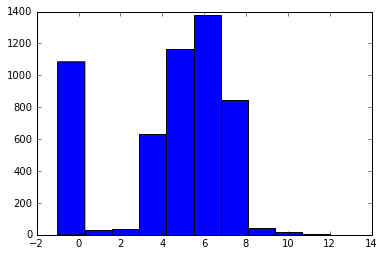

In [208]:
plt.hist(d.values())
plt.show()

#### Structures, Cliques in a Network

A subset of nodes which induce a complete subgraph is a clique.

In [215]:
G = nx.complete_graph(5) # In a complete graph all the nodes are connected to each other.
G.add_edge(4, 5)

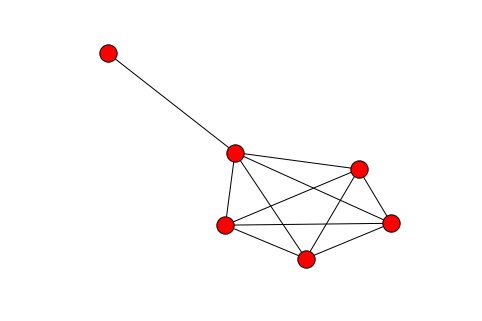

In [216]:
nx.draw(G)

In [227]:
list(nx.clique.find_cliques(G))

[[2, 3, 0], [2, 3, 1]]

### Triads in a Network

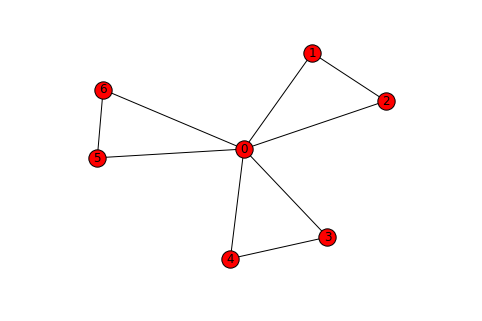

In [220]:
G = nx.Graph()
list_of_edges = [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (1, 2), (3, 4), (5, 6)]
G.add_edges_from(list_of_edges)
nx.draw(G, with_labels=True)

In [222]:
list(nx.find_cliques(G))

[[0, 1, 2], [0, 3, 4], [0, 5, 6]]

[[2, 3, 0], [2, 3, 1]]


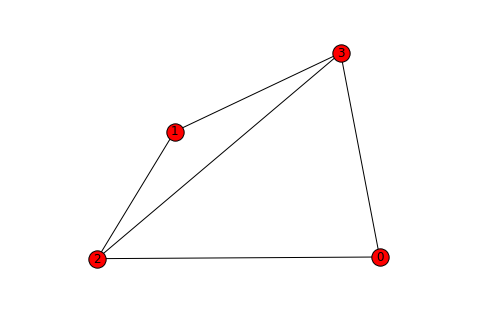

In [225]:
# Facebook friend search, amazon product recommendation.
G = nx.complete_graph(4)
G.remove_edge(0, 1)
nx.draw(G, with_labels=True)
print list(nx.find_cliques(G))

### Excersise - 4



{0: 1, 1: 1, 2: 2, 3: 2}

#### Link Prediction usign Jaccard coefficient

In [251]:
G = nx.erdos_renyi_graph(30, 0.2)
list(nx.jaccard_coefficient(G))

[(0, 1, 0.4),
 (0, 2, 0.0),
 (0, 3, 0.125),
 (0, 4, 0.1111111111111111),
 (0, 5, 0.125),
 (0, 6, 0.2222222222222222),
 (0, 7, 0.0),
 (0, 8, 0.16666666666666666),
 (0, 9, 0.2),
 (0, 10, 0.3333333333333333),
 (0, 11, 0.1111111111111111),
 (0, 12, 0.14285714285714285),
 (0, 14, 0.1111111111111111),
 (0, 15, 0.0),
 (0, 17, 0.0),
 (0, 18, 0.25),
 (0, 19, 0.0),
 (0, 20, 0.16666666666666666),
 (0, 21, 0.0),
 (0, 22, 0.1111111111111111),
 (0, 23, 0.2),
 (0, 24, 0.125),
 (0, 25, 0.25),
 (0, 26, 0.0),
 (0, 28, 0.2),
 (0, 29, 0.0),
 (1, 2, 0.0),
 (1, 3, 0.1111111111111111),
 (1, 4, 0.1),
 (1, 5, 0.1111111111111111),
 (1, 6, 0.2),
 (1, 7, 0.2),
 (1, 8, 0.14285714285714285),
 (1, 9, 0.18181818181818182),
 (1, 10, 0.125),
 (1, 11, 0.1),
 (1, 13, 0.08333333333333333),
 (1, 14, 0.0),
 (1, 15, 0.0),
 (1, 17, 0.1111111111111111),
 (1, 18, 0.1),
 (1, 19, 0.0),
 (1, 20, 0.14285714285714285),
 (1, 21, 0.0),
 (1, 22, 0.1),
 (1, 23, 0.16666666666666666),
 (1, 24, 0.1111111111111111),
 (1, 25, 0.2),
 (1, 28, 

### Excersise - 5

Create a recommender for authors by listing the top 5 authors by jaccard coefficient.

In [247]:
%%time
d ={}
for u, v, p in nx.jaccard_coefficient(authors_graph):
    if u in d:
        d[u].append((v, p))
    elif u not in d:
        d[u] = [(v, p)]
    if v in d:
        d[v].append((u, p))
    elif v not in d:
        d[v] = [(u, p)]

CPU times: user 2min 41s, sys: 2.84 s, total: 2min 44s
Wall time: 2min 45s


In [248]:
reco = {}
for u, w in d.items():
    reco[u] = sorted(w, key=lambda x: x[1], reverse=True)[0:5]

In [249]:
reco

{'3922': [('2810', 0.3),
  ('13703', 0.2),
  ('11791', 0.18181818181818182),
  ('3291', 0.18181818181818182),
  ('23770', 0.1111111111111111)],
 '23991': [('20954', 0.6666666666666666),
  ('18739', 0.4),
  ('19581', 0.3333333333333333),
  ('16084', 0.3333333333333333),
  ('15329', 0.2)],
 '593': [('4515', 0.14285714285714285),
  ('5510', 0.09523809523809523),
  ('9360', 0.08333333333333333),
  ('12334', 0.07407407407407407),
  ('19578', 0.0625)],
 '22466': [('9643', 0.14285714285714285),
  ('22837', 0.1),
  ('20662', 0.1),
  ('21860', 0.09090909090909091),
  ('8549', 0.07142857142857142)],
 '19711': [('17339', 1.0),
  ('20307', 0.5),
  ('15523', 0.5),
  ('8087', 0.3333333333333333),
  ('20660', 0.25)],
 '19710': [('23163', 0.5),
  ('16065', 0.3333333333333333),
  ('14664', 0.3333333333333333),
  ('3683', 0.3333333333333333),
  ('16963', 0.3333333333333333)],
 '22463': [('3878', 0.4),
  ('16584', 0.3333333333333333),
  ('20375', 0.3333333333333333),
  ('17956', 0.2857142857142857),
  ('

### Directed Graphs

![title](img/network.png)

In [316]:
G = nx.DiGraph()
G.add_edge(1, 2)
print G.edges()
# G[1][2]
# G.is_directed()
# type(G)

[(1, 2)]


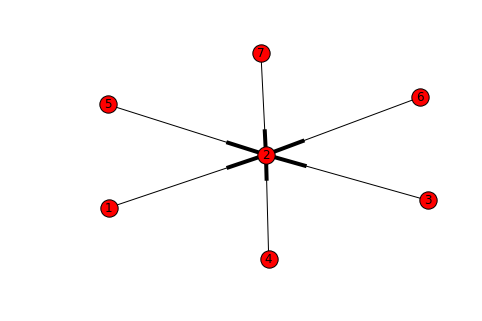

In [319]:
G.add_edges_from([(1, 2), (3, 2), (4, 2), (5, 2), (6, 2), (7, 2)])
nx.draw(G, with_labels=True)

In [320]:
G.in_degree()

{1: 0, 2: 6, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0}

In [321]:
nx.pagerank(G)

{1: 0.0826448180198328,
 2: 0.5041310918810031,
 3: 0.0826448180198328,
 4: 0.0826448180198328,
 5: 0.0826448180198328,
 6: 0.0826448180198328,
 7: 0.0826448180198328}

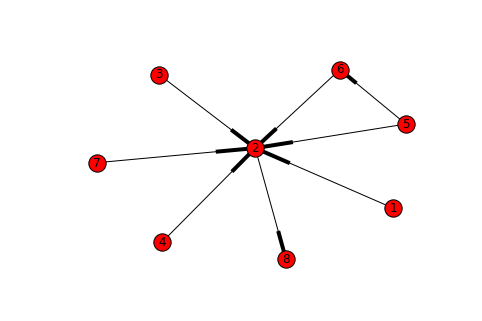

In [327]:
G.add_edge(5, 6)
nx.draw(G, with_labels=True)

In [323]:
nx.pagerank(G)

{1: 0.08024854052495894,
 2: 0.4844028780560986,
 3: 0.08024854052495894,
 4: 0.08024854052495894,
 5: 0.08024854052495894,
 6: 0.11435441931910648,
 7: 0.08024854052495894}

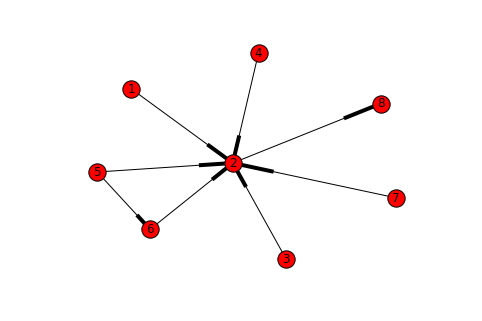

In [326]:
G.add_edge(2, 8)
nx.draw(G, with_labels=True)

In [325]:
nx.pagerank(G)

{1: 0.05378612718073915,
 2: 0.3246687852772877,
 3: 0.05378612718073915,
 4: 0.05378612718073915,
 5: 0.05378612718073915,
 6: 0.0766454192258098,
 7: 0.05378612718073915,
 8: 0.3297551595932067}